Experiment with finding correlations between many pairs of coins.

In [75]:
# Historical snapshot of coins from December 01, 2019: https://coinmarketcap.com/historical/20191201/ used to
# get a representative set of coins from before the period of analysis to avoid look-ahead bias.

strat_7_univ = [
    'BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BCHUSDT', 'LTCUSDT', 'EOSUSDT', 'BNBUSDT',
    'XLMUSDT', 'TRXUSDT', 'ADAUSDT', 'XTZUSDT', 'LINKUSDT', 'ATOMUSDT',
    'NEOUSDT', 'MKRUSDT', 'DASHUSDT', 'ETCUSDT', 'USDCUSDT', 'ONTUSDT', 'VETUSDT',
    'DOGEUSDT', 'BATUSDT', 'ZECUSDT',
    'SNXUSDT', 'QTUMUSDT', 'TUSDUSDT', 'ZRXUSDT',
    'THXUSDT', 'THRUSDT', 'ALGOUSDT', 'REPUSDT', 'NANOUSDT', 'KBCUSDT', 'BTGUSDT', 'RVNUSDT', 'OMGUSDT',
    'CNXUSDT', 'ABBCUSDT', 'XINUSDT', 'VSYSUSDT', 'SEELEUSDT', 'EONUSDT', 'ZBUSDT', 'EKTUSDT', 'DGBUSDT',
    'BTMUSDT', 'LSKUSDT', 'KMDUSDT', 'SAIUSDT', 'LUNAUSDT', 'KCSUSDT', 'FTTUSDT', 'QNTUSDT', 'SXPUSDT',
    'BDXUSDT', 'GAPUSDT', 'BCDUSDT', 'THETAUSDT', 'ICXUSDT', 'FSTUSDT', 'MATICUSDT', 'SCUSDT', 'EVRUSDT',
    'BTTUSDT', 'MOFUSDT', 'IOSTUSDT', 'MCOUSDT', 'WAVESUSDT', 'XVGUSDT', 'MONAUSDT', 'BTSUSDT', 'BCNUSDT',
    'HCUSDT', 'MAIDUSDT', 'NEXOUSDT', 'ARDRUSDT', 'DXUSDT', 'OKBUSDT', 'FXCUSDT', 'RLCUSDT', 'MBUSDT',
    'BXKUSDT', 'AEUSDT', 'ENJUSDT', 'STEEMUSDT', 'SLVUSDT', 'BRZEUSDT', 'ZILUSDT', 'VESTUSDT', 'ZENUSDT',
    'SOLVEUSDT', 'CHZUSDT', 'NOAHUSDT', 'LAUSDT', 'BTMXUSDT', 'ETNUSDT', 'ENGUSDT', 'ILCUSDT', 'NPXSUSDT',
    'CRPTUSDT', 'GNTUSDT', 'SNTUSDT', 'ELFUSDT', 'JWLUSDT', 'FETUSDT', 'BOTXUSDT', 'NRGUSDT', 'DGDUSDT',
    'EXMRUSDT', 'EURSUSDT', 'AOAUSDT', 'RIFUSDT', 'CIX100USDT', 'BFUSDT', 'XZCUSDT', 'FABUSDT', 'GRINUSDT',
    'NETUSDT', 'VERIUSDT', 'DGTXUSDT', 'KNCUSDT', 'RENUSDT', 'STRATUSDT', 'ETPUSDT', 'NEXUSDT', 'NEWUSDT',
    'BCZEROUSDT', 'GXCUSDT', 'TNTUSDT', 'BTC2USDT', 'PPTUSDT', 'USDKUSDT', 'ELAUSDT', 'IGNISUSDT', 'PLCUSDT',
    'BNKUSDT', 'DTRUSDT', 'RCNUSDT', 'HPTUSDT', 'LAMBUSDT', 'MANAUSDT', 'EDCUSDT', 'BEAMUSDT', 'TTUSDT',
    'AIONUSDT', 'BZUSDT', 'WTCUSDT', 'WICCUSDT', 'LRCUSDT', 'BRDUSDT', 'FCTUSDT', 'NULSUSDT', 'FTMUSDT',
    'IOTXUSDT', 'QBITUSDT', 'XMXUSDT', 'YOUUSDT', 'NASUSDT', 'WAXPUSDT', 'ARKUSDT', 'RDDUSDT', 'GNYUSDT',
    'AGVCUSDT', 'HYNUSDT', 'CVCUSDT', 'WANUSDT', 'WINUSDT', 'LINAUSDT', 'RUSDT', 'PAIUSDT', 'FSNUSDT',
    'FUNUSDT', 'DPTUSDT', 'BHDUSDT', 'LOOMUSDT', 'XACUSDT', 'BUSDUSDT', 'BHPUSDT', 'TRUEUSDT', 'LOKIUSDT',
    'QASHUSDT', 'BNTUSDT', 'DOTUSDT', 'SOLUSDT']

In [76]:
from binance.client import Client as bnb_client
from binance.client import BinanceAPIException
from datetime import datetime
import pandas as pd

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in strat_7_univ:
        try:
            px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
            print(f"Downloaded data for {coin}.")
        except BinanceAPIException:
            print(f"Couldn't load data for {coin}.")
    
    return px_data

In [77]:
data_freq = '1d'

px_data = get_price_data_for_universe(data_freq, '2020-01-01')

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for XRPUSDT.
Downloaded data for BCHUSDT.
Downloaded data for LTCUSDT.
Downloaded data for EOSUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XLMUSDT.
Downloaded data for TRXUSDT.
Downloaded data for ADAUSDT.
Downloaded data for XTZUSDT.
Downloaded data for LINKUSDT.
Downloaded data for ATOMUSDT.
Downloaded data for NEOUSDT.
Downloaded data for MKRUSDT.
Downloaded data for DASHUSDT.
Downloaded data for ETCUSDT.
Downloaded data for USDCUSDT.
Downloaded data for ONTUSDT.
Downloaded data for VETUSDT.
Downloaded data for DOGEUSDT.
Downloaded data for BATUSDT.
Downloaded data for ZECUSDT.
Downloaded data for SNXUSDT.
Downloaded data for QTUMUSDT.
Downloaded data for TUSDUSDT.
Downloaded data for ZRXUSDT.
Couldn't load data for THXUSDT.
Couldn't load data for THRUSDT.
Downloaded data for ALGOUSDT.
Couldn't load data for REPUSDT.
Couldn't load data for NANOUSDT.
Couldn't load data for KBCUSDT.
Couldn't load data 

In [141]:
px_data["BTCUSDT"]

px_close = {coin: px_data[coin]["close"] for coin in px_data}
px_close = pd.DataFrame(px_close)
# px_close.set_index("open_time", inplace=True)
px_close.index.rename("date", inplace=True)
px_close = px_close.astype(float)

In [142]:
px_close_in_sample = px_close.loc[:"2022-12-31"]
px_close_out_sample = px_close.loc["2023-01-01":]
px_close_in_sample

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,7195.65,130.52,0.19301,204.31,41.53,NaN,13.6954,0.04525,NaN,0.03346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,6961.80,127.22,0.18762,195.41,39.44,NaN,13.0225,0.04363,NaN,0.03272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,7345.65,133.95,0.19320,222.70,42.05,NaN,13.6231,0.04566,NaN,0.03403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,7349.45,134.02,0.19277,224.25,42.58,NaN,13.7944,0.04574,NaN,0.03441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,7364.19,135.23,0.19462,223.29,43.26,NaN,14.0368,0.04543,NaN,0.03455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,16705.84,1211.86,NaN,101.86,68.72,0.893,246.5520,0.07419,0.05410,0.26009,...,0.3220,0.2045,0.2023,NaN,0.0469,NaN,1.0001,0.339,4.47,11.1081
2022-12-28,16545.89,1189.89,NaN,99.25,66.32,0.867,244.0387,0.07154,0.05408,0.24833,...,0.3036,0.1934,0.1987,NaN,0.0443,NaN,1.0002,0.338,4.29,9.7484
2022-12-29,16634.04,1200.79,NaN,98.31,66.73,0.853,246.4169,0.07195,0.05400,0.24420,...,0.2897,0.1937,0.2020,NaN,0.0426,NaN,1.0002,0.330,4.30,9.6514


In [143]:
corr_matrix = px_close_in_sample.corr()
high_corr_map = dict()
corr_match_map = dict()

def get_max_entry(high_corr_map):
    max_corr = -1.0
    max_key = None
    for key in high_corr_map.keys():
        if high_corr_map[key] > max_corr:
            max_corr = high_corr_map[key]
            max_key = key
    return max_key[0], max_key[1], max_corr

for coin_a in corr_matrix.index:
    for coin_b in corr_matrix.index:
        if coin_a < coin_b and corr_matrix[coin_a][coin_b] > 0.9:
            #print(coin_a, coin_b, corr_matrix[coin_a][coin_b])
            high_corr_map[(coin_a, coin_b)] = corr_matrix[coin_a][coin_b]

while len(high_corr_map) > 0:
    coin_a, coin_b, corr_a_b = get_max_entry(high_corr_map)
    del high_corr_map[(coin_a, coin_b)]
    if coin_a not in corr_match_map and coin_b not in corr_match_map:
        corr_match_map[coin_a] = (coin_b, corr_a_b)
        corr_match_map[coin_b] = (coin_a, corr_a_b)

corr_match_map

{'OMGUSDT': ('ZENUSDT', 0.9920565108527462),
 'ZENUSDT': ('OMGUSDT', 0.9920565108527462),
 'DOTUSDT': ('XLMUSDT', 0.991201095816368),
 'XLMUSDT': ('DOTUSDT', 0.991201095816368),
 'WAXPUSDT': ('ZRXUSDT', 0.9872447375560581),
 'ZRXUSDT': ('WAXPUSDT', 0.9872447375560581),
 'ADAUSDT': ('ENJUSDT', 0.9860904239957506),
 'ENJUSDT': ('ADAUSDT', 0.9860904239957506),
 'LRCUSDT': ('VETUSDT', 0.9800927980973771),
 'VETUSDT': ('LRCUSDT', 0.9800927980973771),
 'ALGOUSDT': ('LINKUSDT', 0.9779931060644512),
 'LINKUSDT': ('ALGOUSDT', 0.9779931060644512),
 'BCHUSDT': ('BNTUSDT', 0.9744989541353984),
 'BNTUSDT': ('BCHUSDT', 0.9744989541353984),
 'MANAUSDT': ('NEOUSDT', 0.9732087477173242),
 'NEOUSDT': ('MANAUSDT', 0.9732087477173242),
 'EOSUSDT': ('ETHUSDT', 0.9671546418402377),
 'ETHUSDT': ('EOSUSDT', 0.9671546418402377),
 'LSKUSDT': ('ONTUSDT', 0.9669950979037544),
 'ONTUSDT': ('LSKUSDT', 0.9669950979037544),
 'ATOMUSDT': ('MATICUSDT', 0.9578116778470918),
 'MATICUSDT': ('ATOMUSDT', 0.9578116778470918)

In [154]:
seen_coins = set()
high_corr_pairs = set()

for k, v in corr_match_map.items():
    if k not in seen_coins:
        seen_coins.add(k)
        seen_coins.add(v[0])
        high_corr_pairs.add((k, v[0]))

high_corr_pairs

{('ADAUSDT', 'ENJUSDT'),
 ('ALGOUSDT', 'LINKUSDT'),
 ('ATOMUSDT', 'MATICUSDT'),
 ('BATUSDT', 'THETAUSDT'),
 ('BCHUSDT', 'BNTUSDT'),
 ('BTCUSDT', 'ZECUSDT'),
 ('BUSDUSDT', 'USDCUSDT'),
 ('DOGEUSDT', 'ETCUSDT'),
 ('DOTUSDT', 'XLMUSDT'),
 ('EOSUSDT', 'ETHUSDT'),
 ('FTMUSDT', 'LTCUSDT'),
 ('KNCUSDT', 'QNTUSDT'),
 ('LRCUSDT', 'VETUSDT'),
 ('LSKUSDT', 'ONTUSDT'),
 ('MANAUSDT', 'NEOUSDT'),
 ('OMGUSDT', 'ZENUSDT'),
 ('QTUMUSDT', 'SNXUSDT'),
 ('WAXPUSDT', 'ZRXUSDT')}

In [166]:
def get_beta_alpha_residuals(px_close_in_sample, high_corr_pairs, interval):
    beta_dict = dict()
    alpha_dict = dict()
    residual_dict = dict()
    
    for coin_a, coin_b in high_corr_pairs:
        px_coin_a = px_close_in_sample[coin_a]
        px_coin_b = px_close_in_sample[coin_b]
        cov_a_b = px_coin_a.rolling(window=interval, min_periods=1).cov(px_coin_b)
        var_a = px_coin_a.rolling(window=interval, min_periods=1).var()
        beta_a_to_b = cov_a_b / var_a
        beta_dict["beta_" + coin_a + "_to_" + coin_b] = beta_a_to_b
        
        a_mean = px_coin_a.rolling(window=30, min_periods=1).mean()
        b_mean = px_coin_b.rolling(window=30, min_periods=1).mean()
        alpha_a_to_b = b_mean - a_mean * beta_a_to_b
        alpha_dict["alpha_" + coin_a + "_to_" + coin_b] = alpha_a_to_b
        
        residual_dict["res_" + coin_a + "_to_" + coin_b] = px_coin_b - alpha_a_to_b - beta_a_to_b * px_coin_a
        
    beta_df = pd.DataFrame(beta_dict, index=px_close_in_sample.index)
    alpha_df = pd.DataFrame(alpha_dict, index=px_close_in_sample.index)
    residual_df = pd.DataFrame(residual_dict, index=px_close_in_sample.index)
    
    return (beta_df, alpha_df, residual_df)

In [168]:
trailing_90d_beta = pd.DataFrame(index=px_close_in_sample.index)

# for (coin_a, coin_b) in high_corr_pairs:
    

# trailing_90d_beta

cov_OMG_ZEN = px_close_in_sample['OMGUSDT'].rolling(window=30, min_periods=1).cov(px_close_in_sample['ZENUSDT'])
var_OMG = px_close_in_sample['OMGUSDT'].rolling(window=30, min_periods=1).var()
beta_OMG_to_ZEN = cov_OMG_ZEN / var_OMG

In [169]:
OMG_mean = px_close_in_sample['OMGUSDT'].rolling(window=30, min_periods=1).mean()
ZEN_mean = px_close_in_sample['ZENUSDT'].rolling(window=30, min_periods=1).mean()

In [170]:
alpha_OMG_to_ZEN = ZEN_mean - OMG_mean * beta_OMG_to_ZEN
alpha_OMG_to_ZEN

date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
                ...   
2022-12-27    0.940986
2022-12-28    0.877658
2022-12-29    0.809720
2022-12-30    0.189565
2022-12-31    0.061219
Freq: D, Length: 1096, dtype: float64

In [171]:
px_close_in_sample['ZENUSDT'] - alpha_OMG_to_ZEN - px_close_in_sample['OMGUSDT'] * beta_OMG_to_ZEN

date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
                ...   
2022-12-27    0.169543
2022-12-28    0.004471
2022-12-29    0.067851
2022-12-30    0.006931
2022-12-31    0.171214
Freq: D, Length: 1096, dtype: float64

<Axes: xlabel='date'>

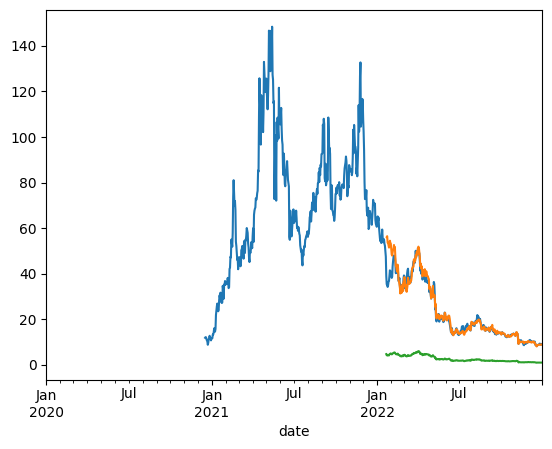

In [172]:
px_close_in_sample['ZENUSDT'].plot()
(alpha_OMG_to_ZEN + px_close_in_sample['OMGUSDT'] * beta_OMG_to_ZEN).plot()
px_close_in_sample['OMGUSDT'].plot()

In [173]:
beta_df, alpha_df, residual_df = get_beta_alpha_residuals(px_close_in_sample, high_corr_pairs, 30)
residual_df

,res_LSKUSDT_to_ONTUSDT,res_BCHUSDT_to_BNTUSDT,res_BATUSDT_to_THETAUSDT,res_FTMUSDT_to_LTCUSDT,res_DOTUSDT_to_XLMUSDT,res_ALGOUSDT_to_LINKUSDT,res_ADAUSDT_to_ENJUSDT,res_EOSUSDT_to_ETHUSDT,res_BTCUSDT_to_ZECUSDT,res_WAXPUSDT_to_ZRXUSDT,res_OMGUSDT_to_ZENUSDT,res_ATOMUSDT_to_MATICUSDT,res_QTUMUSDT_to_SNXUSDT,res_BUSDUSDT_to_USDCUSDT,res_LRCUSDT_to_VETUSDT,res_DOGEUSDT_to_ETCUSDT,res_KNCUSDT_to_QNTUSDT,res_MANAUSDT_to_NEOUSDT
date,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.263256e-14,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.493076e-02,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.583688e-02,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.012940e-02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,-0.009808,-0.005851,0.018322,1.626675,0.000048,0.079181,-0.004721,-6.659911,-3.248536,-0.003406,0.169543,-0.028361,0.013523,-0.000717,-0.000221,-9.904919e-02,7.210489,-0.319725
2022-12-28,-0.010392,0.003562,0.035644,0.580098,-0.000146,-0.089977,-0.003548,-14.892100,-3.382317,-0.003281,0.004471,-0.046907,-0.008218,-0.000562,0.000110,-4.093025e-01,2.499683,-0.282603
2022-12-29,-0.006723,-0.000189,0.012194,0.315963,0.000106,-0.109058,-0.008933,3.202606,-2.977580,0.000149,0.067851,-0.066908,-0.008343,0.000264,0.000149,1.743670e-01,7.017915,-0.112594


In [177]:
demeaned_residuals = residual_df.subtract(residual_df.rolling(window=30, min_periods=1).mean(), axis=0)
normalized_residuals = demeaned_residuals.divide(residual_df.rolling(window=30, min_periods=1).std(), axis=0)
normalized_residuals

,res_LSKUSDT_to_ONTUSDT,res_BCHUSDT_to_BNTUSDT,res_BATUSDT_to_THETAUSDT,res_FTMUSDT_to_LTCUSDT,res_DOTUSDT_to_XLMUSDT,res_ALGOUSDT_to_LINKUSDT,res_ADAUSDT_to_ENJUSDT,res_EOSUSDT_to_ETHUSDT,res_BTCUSDT_to_ZECUSDT,res_WAXPUSDT_to_ZRXUSDT,res_OMGUSDT_to_ZENUSDT,res_ATOMUSDT_to_MATICUSDT,res_QTUMUSDT_to_SNXUSDT,res_BUSDUSDT_to_USDCUSDT,res_LRCUSDT_to_VETUSDT,res_DOGEUSDT_to_ETCUSDT,res_KNCUSDT_to_QNTUSDT,res_MANAUSDT_to_NEOUSDT
date,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.707107,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.732919,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.992176,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,-0.590378,-0.057339,0.742470,0.206815,0.639581,-0.101083,-1.860672,-0.275575,-1.337983,-1.047849,-0.024654,-1.166475,0.301883,-0.856440,0.492522,1.320163,1.657483,-1.671147
2022-12-28,-0.639156,0.526529,1.421252,0.089316,0.677071,-0.330778,-1.510201,-0.605028,-1.296896,-0.980311,-0.627122,-1.691014,0.034862,-0.510293,1.276196,0.876933,0.333244,-1.413603
2022-12-29,-0.076213,0.176437,0.554595,0.112746,0.961099,-0.313534,-2.392230,0.032778,-1.083948,-0.105381,-0.442146,-2.139011,-0.017118,1.136448,1.300117,1.485858,1.463105,-0.717002
